# importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# importing dataset

In [ ]:
df = pd.read_csv('Facebook_Marketplace_data.csv')

df['status_published'] = pd.to_datetime(df['status_published'])
df['numeric_date'] = (df['status_published'] - df['status_published'].min()).dt.days
 # Converting dates to days since the earliest date

x = df['numeric_date'].values
y = df.iloc[:,3].values

'''
print(x)
print(y)
'''

'\nprint(x)\nprint(y)\n'

# splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

'''
print(x_train)
print(x_test)
print(y_train)
print(y_test)
'''

'\nprint(x_train)\nprint(x_test)\nprint(y_train)\nprint(y_test)\n'

# QUESTION - How does the time of upload affects the num_reaction?


TRAINING THE LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Reshape x_train to a 2D array
x_train = x_train.reshape(-1, 1)

regressor.fit(x_train, y_train)

LinearRegression()

Prediciting results of test set

In [ ]:
x_test = x_test.reshape(-1, 1)
y_pred = regressor.predict(x_test)

Visualising training data

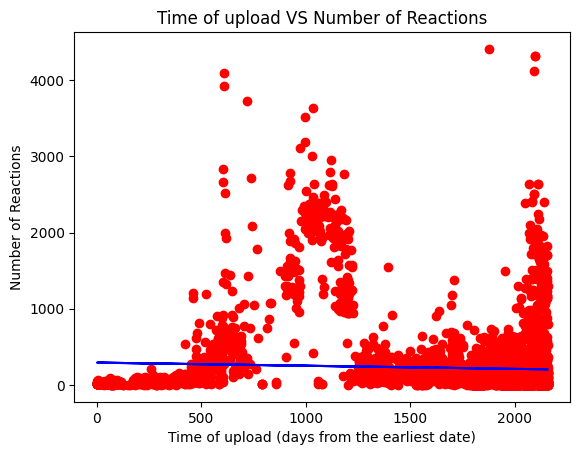

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Time of upload VS Number of Reactions')
plt.xlabel('Time of upload (days from the earliest date)')
plt.ylabel('Number of Reactions')
plt.show()

Visualising test data

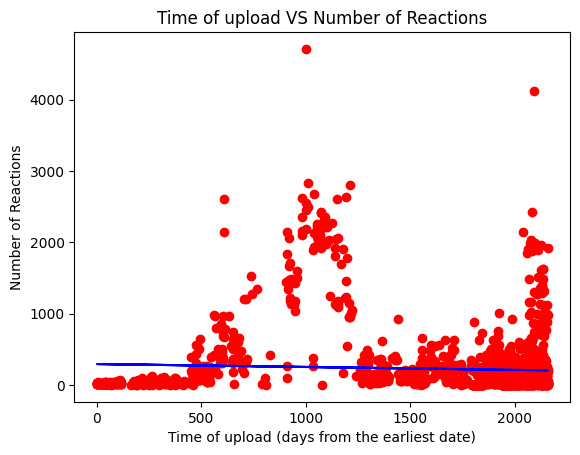

In [ ]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Time of upload VS Number of Reactions')
plt.xlabel('Time of upload (days from the earliest date)')
plt.ylabel('Number of Reactions')
plt.show()

# QUESTION : Correlation between engagement metrics

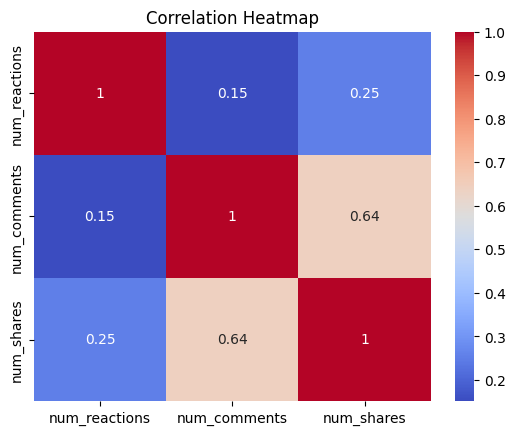

In [ ]:
corr_reactions_comments, _ = pearsonr(df['num_reactions'], df['num_comments'])
corr_reactions_shares, _ = pearsonr(df['num_reactions'], df['num_shares'])
sns.heatmap(df[['num_reactions', 'num_comments', 'num_shares']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




In [ ]:
df.fillna(method='ffill', inplace=True)

# Calculating the Pearson correlation coefficient and p-value
corr_reactions_comments, p_value_reactions_comments = pearsonr(df['num_reactions'], df['num_comments'])
corr_reactions_shares, p_value_reactions_shares = pearsonr(df['num_reactions'], df['num_shares'])

print(f"Pearson correlation coefficient between num_reactions and num_comments: {corr_reactions_comments}")
print(f"P-value: {p_value_reactions_comments}")
print(f"Pearson correlation coefficient between num_reactions and num_shares: {corr_reactions_shares}")
print(f"P-value: {p_value_reactions_shares}")


Pearson correlation coefficient between num_reactions and num_comments: 0.15084290344217632
P-value: 3.7253269447676314e-37
Pearson correlation coefficient between num_reactions and num_shares: 0.25072251662831885
P-value: 1.6362446421107487e-101


# QUESTION : What is the count of different types of posts in the dataset?


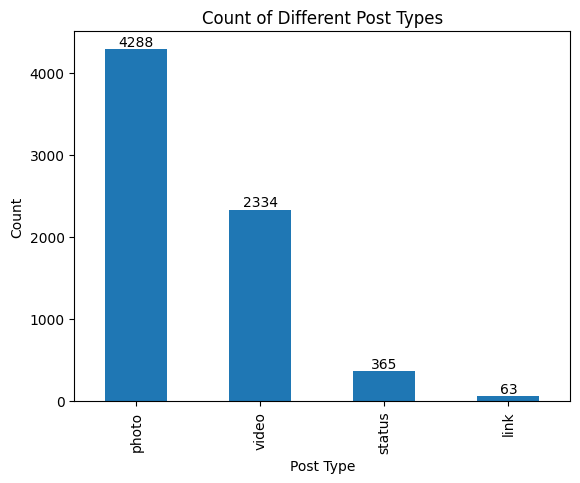

In [ ]:
post_counts = df['status_type'].value_counts()
bars = post_counts.plot(kind='bar')


for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',xytext=(0, 5), textcoords='offset points')

plt.xlabel('Post Type')
plt.ylabel('Count')
plt.title('Count of Different Post Types')
plt.show()

# Question : Average values of engagement metrics by post type

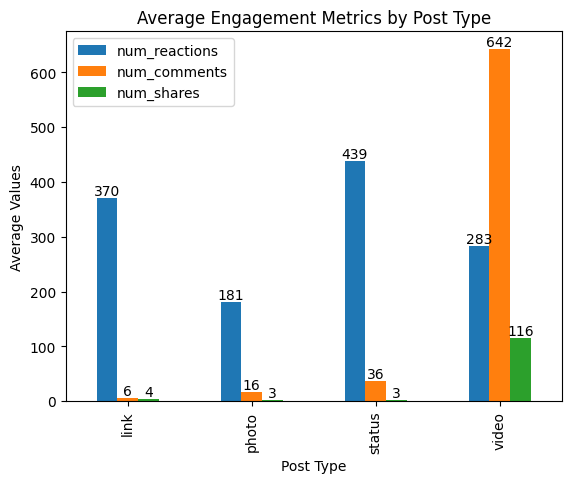

In [ ]:

avg_metrics = df.groupby('status_type').mean()[['num_reactions', 'num_comments', 'num_shares']]
bars=avg_metrics.plot(kind='bar')

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',xytext=(0, 5), textcoords='offset points')

plt.xlabel('Post Type')
plt.ylabel('Average Values')
plt.title('Average Engagement Metrics by Post Type')
plt.show()

# QUESTION

*   Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

*   Use the elbow method to find the optimum number of clusters.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

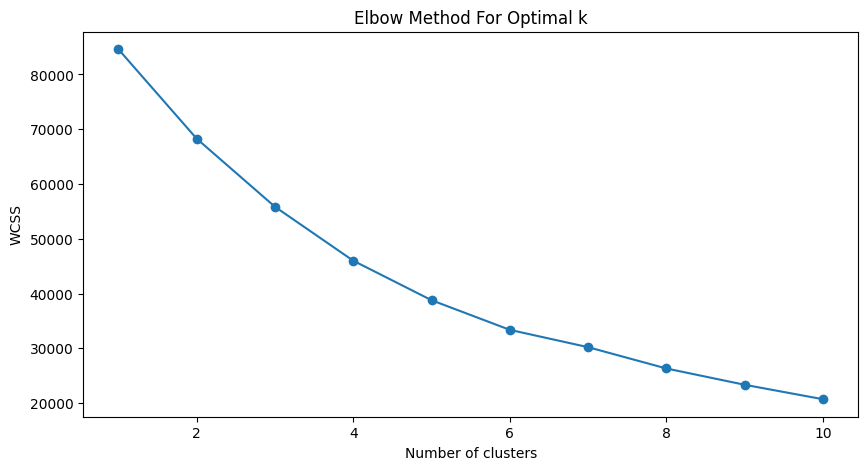

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
 [[-0.29547074 -0.23892984 -0.29075009 -0.27528308 -0.28653947 -0.08556417
  -0.13974237 -0.07412152 -0.12257706  0.64929147  0.05373838 -0.70349907]
 [ 1.49599552  3.72782889  3.98612611  1.10892876  3.92134905  2.41053928
   2.77534338  1.92737133  2.51445004 -1.11415447 -0.23366611  1.28471081]
 [-0.13416932  0.17584344  0.26692662 -0.16090807  0.26789744 -0.07663785
   0.04901074 -0.006885    0.04138605 -1.24599285 -0.23366611  1.42146599]
 [ 3.43953085 -0.183831   -0.22096149  3.56092955 -0.24103803  0.13127611
  -0.12968868 -0.13233393 -0.1483304  -0.1029926   0.80037307 -0.33120061]]


In [ ]:
df = pd.read_csv('Facebook_Marketplace_data.csv')

columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Ensuring no missing values in selected columns
df = df[columns].dropna()

# Converting categorical data to numerical
df = pd.get_dummies(df, columns=['status_type'], drop_first=True)

# Standardizing the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

#  the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train the K-Means model with the optimal number of clusters
optimal_num = 4
kmeans = KMeans(n_clusters=optimal_num, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)